# 👋 Tutoriel de Classification Multiclasse avec PyCaret

PyCaret est une bibliothèque open-source de machine learning en Python avec peu de code, qui automatise les workflows de machine learning. C'est un outil de gestion de modèles et de machine learning de bout en bout qui accélère exponentiellement le cycle d'expérimentation et vous rend plus productif.

Comparé aux autres bibliothèques de machine learning open-source, PyCaret est une bibliothèque alternative avec peu de code qui peut remplacer des centaines de lignes de code par seulement quelques lignes. Cela rend les expériences exponentiellement rapides et efficaces. PyCaret est essentiellement un wrapper Python autour de plusieurs bibliothèques et frameworks de machine learning, tels que scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, et quelques autres.

Le design et la simplicité de PyCaret sont inspirés par le rôle émergent des data scientists citoyens, un terme utilisé pour la première fois par Gartner. Les data scientists citoyens sont des utilisateurs expérimentés capables de réaliser des tâches analytiques simples et modérément sophistiquées qui nécessitaient auparavant une expertise technique plus pointue.


# Partie I : Découverte 🧭

# 💻 Installation

Vous pouvez installer PyCaret avec le gestionnaire de paquets pip de Python :

`pip install pycaret`

L'installation par défaut de PyCaret n'installera pas automatiquement toutes les dépendances supplémentaires. Pour cela, vous devrez installer la version complète (C'est long, prennez le temps de le faire une fois, le tutoriel va evoqué une bonne partie des solutions.):

`pip install pycaret[full]`

ou selon votre cas d'utilisation, vous pouvez installer l'une des variantes suivantes (pratique quand on veut faire des taches spécifiques):

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
%pip install pycaret[full] --quiet

# check installed version
import pycaret
pycaret.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.

'3.3.2'

# 🚀 C'est parti !

### 📚 Documentation et Aide

N'hésitez pas à consulter la [documentation officielle de PyCaret](https://pycaret.gitbook.io/docs/get-started/quickstart) et la [documentation API](https://pycaret.readthedocs.io/en/latest/api/classification.html#module-pycaret.classification) pour une liste complète des paramètres disponibles et des exemples d'utilisation.


Mise en place de l'environnement
Assurons-nous d'avoir toutes les dépendances nécessaires pour ce TP. Nous allons utiliser un dataset pour notre démonstration. Dans ce cas, nous allons utiliser le célèbre dataset 'Iris' (oui, celui avec les fleurs 🌸). Pourquoi ? Parce qu'on le connaît tous, il est léger et facile à comprendre !

In [2]:
# Importation des librairies nécessaires
import pandas as pd
from pycaret.datasets import get_data

# Chargement du dataset Iris
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 🧐 Pour ceux qui ne se souviennent pas du dataset Iris - Facultatif
Pas de problème, nous avons une solution pour vous ! Historiquement, PyCaret proposait de l'EDA (Exploratory Data Analysis) intégrée, mais cette fonctionnalité a disparu en version 3 😭. Ne vous inquiétez pas, nous allons utiliser les bonnes vieilles méthodes pour visualiser nos données en attendant que cette fonctionnalité revienne.
Pour cela, nous allons créer une visualisation 2D et 3D de nos données avec UMAP.

In [3]:
%pip install umap-learn matplotlib seaborn plotly --quiet

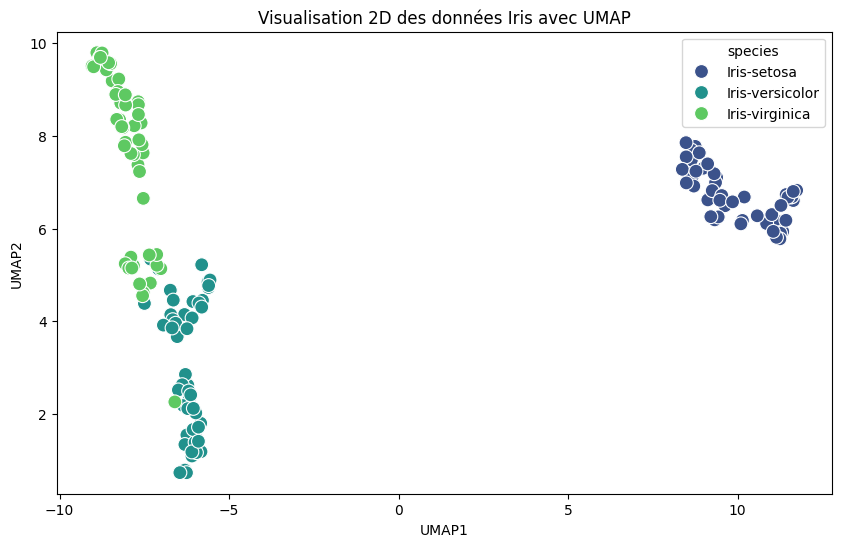

In [4]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation des données pour UMAP
X = data.drop(columns=['species'])
y = data['species']

# Réduction de dimensionnalité avec UMAP
reducer = umap.UMAP()
X_embedded = reducer.fit_transform(X)

# Création du DataFrame pour la visualisation
embedding = pd.DataFrame(X_embedded, columns=['UMAP1', 'UMAP2'])
embedding['species'] = y

# Visualisation 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=embedding, x='UMAP1', y='UMAP2', hue='species', palette='viridis', s=100)
plt.title('Visualisation 2D des données Iris avec UMAP')
plt.show()

### Visualisation 3D avec UMAP
Pour ceux qui aiment les graphiques en 3D et interactifs

In [5]:
import umap
import plotly.express as px

# Réduction de dimensionnalité en 3D avec UMAP
reducer = umap.UMAP(n_components=3)
X_embedded_3d = reducer.fit_transform(X)

# Création du DataFrame pour la visualisation
embedding_3d = pd.DataFrame(X_embedded_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
embedding_3d['species'] = y

# Visualisation 3D
fig = px.scatter_3d(embedding_3d, x='UMAP1', y='UMAP2', z='UMAP3', color='species', title='Visualisation 3D des données Iris avec UMAP')
fig.show()


## 📊 Préparation des données
PyCaret simplifie cette étape avec quelques commandes simples. Nous allons d'abord voir comment initialiser l'environnement de classification avec la fonction setup.

In [6]:
# Importation des modules nécessaires
from pycaret.classification import *

# Initialisation de l'environnement de classification
clf = setup(data, target='species', session_id=42)

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


### 📋 Informations affichées par `setup`

Une fois la configuration réussie, PyCaret affiche une grille d'informations contenant des détails sur l'expérimentation :

- **Session id** : Un nombre pseudo-aléatoire utilisé comme "seed" pour toutes les fonctions afin de garantir la reproductibilité. Si aucun `session_id` n'est fourni, un nombre aléatoire est automatiquement généré et distribué à toutes les fonctions. Mais bon, pourquoi ne pas mettre `42`...
- **Target type** : Type de la variable cible (binaire, multiclasses ou régression). Le type de la cible est automatiquement détecté.
- **Label Encoding** : Lorsque la variable cible est de type chaîne (par exemple, 'Oui' ou 'Non') au lieu de 1 ou 0, PyCaret encode automatiquement les étiquettes en 1 et 0 et affiche le mappage (0 : Non, 1 : Oui) pour référence.
- **Original data shape** : Forme des données originales avant toute transformation.
- **Transformed train set shape** : Forme du jeu d'entraînement transformé. C'est important de faire attention, en cas d'un OneHot Encoder ou un feature selection !
- **Transformed test set shape** : Forme du jeu de test transformé.
- **Numeric features** : Nombre de caractéristiques considérées comme numériques.
- **Categorical features** : Nombre de caractéristiques considérées comme catégorielles.


### Accéder aux variables de configuration

Pour accéder à toutes les variables créées par la fonction `setup` telles que le dataset transformé, le `random_state`, etc., vous pouvez utiliser la méthode `get_config`.

#### Exemple d'utilisation de `get_config`

In [7]:
# Vérifier toutes les configurations disponibles
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [8]:
# Accéder à la variable X_train_transformed
X_train_transformed = get_config('X_train_transformed')

Vous pouvez également obtenir de l'aide sur la fonction setup en utilisant :

In [9]:
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, prepr

### Comparaison Avant/Après avec une ACP en 2D
Il est possible de comparer les données avant et après transformation grâce à get_config. Voici comment le faire avec une ACP en 2D.

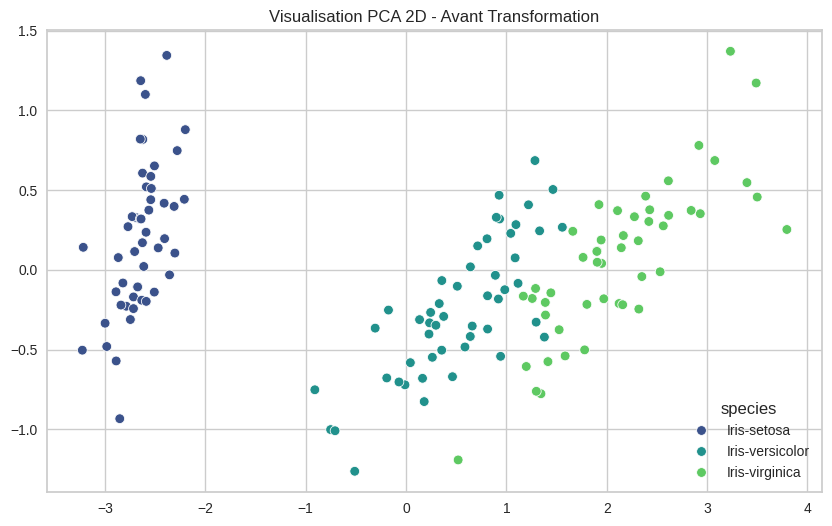

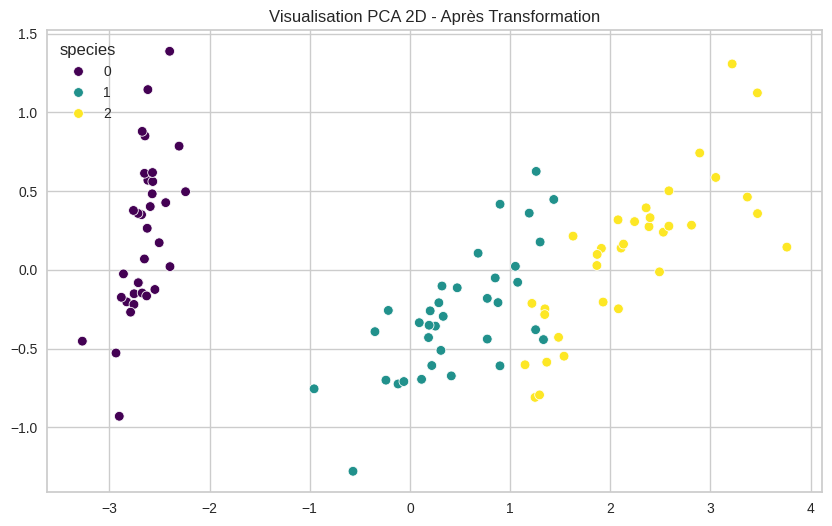

In [10]:
from sklearn.decomposition import PCA

# Accéder aux données transformées
X_train_transformed = get_config('X_train_transformed')
y_train = get_config('y_train_transformed').reset_index(drop=True)  # Réinitialiser les index pour s'assurer qu'ils correspondent

# Utiliser le même réducteur PCA pour les deux visualisations
pca = PCA(n_components=2)

# Visualisation avant transformation
X = data.drop(columns=['species'])
y = data['species']
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis')
plt.title('Visualisation PCA 2D - Avant Transformation')
plt.show()

# Visualisation après transformation
X_pca_transformed = pca.fit_transform(X_train_transformed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_transformed[:,0], y=X_pca_transformed[:,1], hue=y_train, palette='viridis')
plt.title('Visualisation PCA 2D - Après Transformation')
plt.show()

## 📊 Préparation des données avec PyCaret

Comme vous le savez, la préparation des données est une étape cruciale. PyCaret simplifie (beaucoup) ce processus avec des paramètres faciles à utiliser, vous permettant de traiter les valeurs manquantes, encoder les variables catégorielles, équilibrer les classes cibles, et bien plus encore. Voici un aperçu des possibilités :
Avant de plonger dans les exemples spécifiques, notez que chaque configuration de `setup` inclut un `experiment_name` et des `experiment_custom_tags`. L'`experiment_name` est un identifiant unique pour chaque expérience, ce qui permet de suivre et de gérer vos expérimentations de manière plus organisée. Les `experiment_custom_tags` sont des annotations que vous pouvez utiliser pour décrire les paramètres spécifiques ou les transformations appliquées dans chaque configuration. Nous expliquerons comment utiliser ces éléments pour améliorer votre flux de travail à la fin de cette section.

### 🛠️ Prétraitement des données

#### Valeurs manquantes

PyCaret peut gérer automatiquement les valeurs manquantes avec différentes stratégies d'imputation :
- **Simple imputation** : Remplace les valeurs manquantes par la moyenne (pour les variables numériques) ou la modalité (pour les variables catégorielles).
- **Iterative imputation** : Utilise des modèles de machine learning pour imputer les valeurs manquantes.


In [11]:
clf = setup(data, target='species', session_id=42,
            imputation_type='simple',  # Simple imputation

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='missing_values',
            experiment_custom_tags={'imputation': 'simple'})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:57:59 INFO mlflow.tracking.fluent: Experiment with name 'missing_values' does not exist. Creating a new experiment.


#### Types de données

PyCaret détecte automatiquement les types de données, mais vous pouvez également les spécifier manuellement :
- **Détection automatique** : Utilise des heuristiques pour détecter les types de données.
- **Spécification manuelle** : Permet de forcer les types de données.

In [12]:
clf = setup(data, target='species', session_id=42,
            categorical_features=['sepal_length', 'sepal_width'],

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='data_types',
            experiment_custom_tags={'categorical_features': 'specified'})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 26)"
6,Transformed train set shape,"(105, 26)"
7,Transformed test set shape,"(45, 26)"
8,Numeric features,2
9,Categorical features,2


2024/05/31 07:58:04 INFO mlflow.tracking.fluent: Experiment with name 'data_types' does not exist. Creating a new experiment.


#### Déséquilibre des classes

Pour gérer les déséquilibres dans les classes cibles, vous pouvez utiliser le paramètre `fix_imbalance` :
- **SMOTE (Synthetic Minority Over-sampling Technique)** : Génère des échantillons synthétiques pour les classes minoritaires.


In [13]:
clf = setup(data, target='species', session_id=42,
            fix_imbalance=True,

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='target_imbalance',
            experiment_custom_tags={'imbalance': 'fixed'})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:10 INFO mlflow.tracking.fluent: Experiment with name 'target_imbalance' does not exist. Creating a new experiment.


#### Suppression des valeurs aberrantes

PyCaret peut également supprimer automatiquement les valeurs aberrantes des données :
- **Isolation Forest** : Algorithme utilisé pour détecter et supprimer les valeurs aberrantes.

In [14]:
clf = setup(data, target='species', session_id=42,
            remove_outliers=True,

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='remove_outliers',
            experiment_custom_tags={'outliers': 'removed'})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(144, 5)"
6,Transformed train set shape,"(99, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:16 INFO mlflow.tracking.fluent: Experiment with name 'remove_outliers' does not exist. Creating a new experiment.


### 📏 Scalers

Les scalers sont utilisés pour normaliser ou standardiser les données :
- **Z-Score** : Normalise les données pour avoir une moyenne de 0 et un écart-type de 1.
- **Min-Max Scaling** : Normalise les données pour qu'elles se situent entre 0 et 1.
- **MaxAbs Scaling** : Scales les données en utilisant la valeur maximale absolue de chaque caractéristique.
- **Robust Scaling** : Utilise des statistiques robustes (comme la médiane et l'IQR) pour réduire l'influence des valeurs aberrantes.


In [15]:
clf = setup(data, target='species', session_id=42,
            normalize=True,
            normalize_method='zscore',  # Options: 'zscore', 'minmax', 'maxabs', 'robust'

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='scalers',
            experiment_custom_tags={'scaling_method': 'zscore'})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:19 INFO mlflow.tracking.fluent: Experiment with name 'scalers' does not exist. Creating a new experiment.


### 🔧 Feature Engineering

Le feature engineering permet de créer de nouvelles caractéristiques à partir de celles existantes.

#### Polynômes et interactions

Vous pouvez créer des caractéristiques polynomiales et des interactions :
- **Polynomial Features** : Génère des caractéristiques polynomiales jusqu'à un degré spécifié.
- **Interactions** : Crée des caractéristiques qui sont des produits de paires de caractéristiques originales.


In [16]:
clf = setup(data, target='species', session_id=42,
            polynomial_features=True,
            polynomial_degree=2,

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='polynomial_features',
            experiment_custom_tags={'polynomial_degree': 2})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 15)"
6,Transformed train set shape,"(105, 15)"
7,Transformed test set shape,"(45, 15)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:23 INFO mlflow.tracking.fluent: Experiment with name 'polynomial_features' does not exist. Creating a new experiment.


#### Regroupement des caractéristiques

Regroupez les caractéristiques pour des analyses plus spécifiques :
- **Group Features** : Permet de combiner plusieurs caractéristiques en une seule.

In [17]:
clf = setup(data, target='species', session_id=42,
            group_features={'sepal_features': ['sepal_length', 'sepal_width']},

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='group_features',
            experiment_custom_tags={'group_features': 'sepal_length_sepal_width'})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 11)"
6,Transformed train set shape,"(105, 11)"
7,Transformed test set shape,"(45, 11)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:27 INFO mlflow.tracking.fluent: Experiment with name 'group_features' does not exist. Creating a new experiment.


### 🏷️ Sélection de caractéristiques

La sélection de caractéristiques permet d'identifier et de conserver les caractéristiques les plus importantes :
- **Recursive Feature Elimination (RFE)** : Algorithme pour sélectionner les caractéristiques les plus importantes en supprimant progressivement les moins importantes.

In [18]:
clf = setup(data, target='species', session_id=42,
            feature_selection=True,
            n_features_to_select=0.5,

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='feature_selection',
            experiment_custom_tags={'n_features_to_select': 0.5})

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 3)"
6,Transformed train set shape,"(105, 3)"
7,Transformed test set shape,"(45, 3)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:31 INFO mlflow.tracking.fluent: Experiment with name 'feature_selection' does not exist. Creating a new experiment.


### 🔍 Suppression de la multicolinéarité

Pour gérer la multicolinéarité entre les caractéristiques, vous pouvez utiliser ce paramètre :
- **Variance Inflation Factor (VIF)** : Mesure la quantité de multicolinéarité dans un ensemble de variables de régression.

In [19]:
clf = setup(data, target='species', session_id=42,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.9,

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='remove_multicollinearity',
            experiment_custom_tags={'multicollinearity_threshold': 0.9})

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 4)"
6,Transformed train set shape,"(105, 4)"
7,Transformed test set shape,"(45, 4)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:33 INFO mlflow.tracking.fluent: Experiment with name 'remove_multicollinearity' does not exist. Creating a new experiment.


### 🧙‍♂️ Exemple complet

Voici un exemple complet intégrant plusieurs de ces options :

In [20]:
clf = setup(data, target='species', session_id=42,
            imputation_type='simple',  # Simple imputation
            normalize=True,  # Normalisation
            normalize_method='zscore',  # Méthode de normalisation
            polynomial_features=True,  # Création de caractéristiques polynomiales
            polynomial_degree=2,  # Degré des caractéristiques polynomiales
            group_features={'sepal_features': ['sepal_length', 'sepal_width']},  # Regroupement des caractéristiques
            feature_selection=True,  # Sélection des caractéristiques
            n_features_to_select=0.5,  # Seuil de sélection
            remove_multicollinearity=True,  # Suppression de la multicolinéarité
            multicollinearity_threshold=0.9,  # Seuil de multicolinéarité
            fix_imbalance=True,  # Gestion du déséquilibre des classes
            remove_outliers=True,  # Suppression des valeurs aberrantes

            # Ce qui suit est pour plus tard ;)
            log_experiment=True,
            experiment_name='full_setup',
            experiment_custom_tags={
                'imputation': 'simple',
                'normalize_method': 'zscore',
                'polynomial_degree': 2,
                'group_features': 'sepal_length_sepal_width',
                'n_features_to_select': 0.5,
                'multicollinearity_threshold': 0.9,
                'imbalance': 'fixed',
                'outliers': 'removed'
            })


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(147, 3)"
6,Transformed train set shape,"(102, 3)"
7,Transformed test set shape,"(45, 3)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:37 INFO mlflow.tracking.fluent: Experiment with name 'full_setup' does not exist. Creating a new experiment.


## Customisation de la Pipeline PyCaret avec des Transformations Spécifiques

C'est bien beau d'utiliser PyCaret avec ses fonctionnalités intégrées, mais comment faire si on a une super idée qui nous vient en tête pour la préparation et qui permettra d'obtenir des résultats bien meilleurs ? 🤔

Prenons l'exemple du dataset Iris. Nous voulons ajouter une transformation personnalisée pour créer une nouvelle fonctionnalité basée sur le rapport entre la longueur et la largeur des pétales. Voici comment procéder :

### 1. Création d'une Transformation Personnalisée

D'abord, nous définissons notre propre transformateur scikit-learn :


In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class PetalRatio(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['petal_ratio'] = X['petal_length'] / X['petal_width']
        return X

In [22]:
# Création du transformateur personnalisé
petal_ratio_transformer = PetalRatio()

# Configuration du setup PyCaret avec la pipeline personnalisée
clf = setup(data, target='species', session_id=42,
            # C'est ici que ca se passe :
            custom_pipeline=[('petal_ratio_transformer', petal_ratio_transformer)],

            log_experiment=True,
            experiment_name='custom_setup_iris')

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 6)"
6,Transformed train set shape,"(105, 6)"
7,Transformed test set shape,"(45, 6)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:40 INFO mlflow.tracking.fluent: Experiment with name 'custom_setup_iris' does not exist. Creating a new experiment.


### 📚 Documentation et Aide

N'hésitez pas à consulter la [documentation officielle de PyCaret](https://pycaret.readthedocs.io/en/latest/api/classification.html#module-pycaret.classification) pour une liste complète des paramètres disponibles et des exemples d'utilisation.

## 📈 Experiment Logging avec PyCaret

PyCaret offre une fonctionnalité d'Experiment Logging qui vous permet de suivre, comparer et analyser différentes expérimentations. Cette fonctionnalité est particulièrement utile pour tester différentes configurations de préparation des données et voir lesquelles sont les plus efficaces.

### 🚀 Mise en place de l'Experiment Logging

Pour commencer avec l'Experiment Logging, vous devez initialiser une session de traçage. PyCaret supporte plusieurs outils de traçage, comme MLflow, WandB, et neptune.ai. Dans cet exemple, nous allons utiliser MLflow qui est evidemment integré avec Pycaret.

Initialisation de la session de traçage
Vous pouvez initialiser une session de traçage avec la fonction setup en utilisant le paramètre log_experiment.

In [23]:
from pycaret.classification import *

# Initialisation de l'Experiment Logging avec MLflow
clf = setup(data, target='species', session_id=42,
            log_experiment=True,
            log_plots=True,
            experiment_name='iris_classification_experiment'
            )


,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


2024/05/31 07:58:42 INFO mlflow.tracking.fluent: Experiment with name 'iris_classification_experiment' does not exist. Creating a new experiment.


### Deux solutions (à choisir une des deux) :
1. Si vous êtes sur votre machine en local :

In [24]:
#Ouvrir l'interface graphique : http://127.0.0.1:5000/
!mlflow ui

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)
[2024-05-31 07:58:45 +0000] [2036] [INFO] Starting gunicorn 22.0.0
[2024-05-31 07:58:45 +0000] [2036] [INFO] Listening at: http://127.0.0.1:5000 (2036)
[2024-05-31 07:58:45 +0000] [2036] [INFO] Using worker: sync
[2024-05-31 07:58:45 +0000] [2037] [INFO] Booting worker with pid: 2037
[2024-05-31 07:58:45 +0000] [2038] [INFO] Booting worker with pid: 2038
[2024-05-31 07:58:45 +0000] [2043] [INFO] Booting worker with pid: 2043
[2024-05-31 07:58:46 +0000] [2044] [INFO] Booting worker with pid: 2044
[2024-05-31 07:58:59 +0000] [2036] [INFO] Handling signal: int

Aborted!
[2024-05-31 07:58:59 +0000] [2044] [INFO] Worker exiting (pid: 2044)
[2024-05-31 07:58:59 +0000] [2038] [INFO] Worker exiting (pid: 2038)
[2024-05-31 07:58:59 +0000] [2043] [INFO] Worker exiting (pid: 2043

2. Si vous êtes sur une machine en remote (Colab, Kaggle...)

In [42]:
!pip install mlflow --quiet
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.366s


In [48]:
# Démarrer le serveur MLflow
get_ipython().system_raw("mlflow ui --port 5000 &")

print("Le mot de passe est : ")
!wget -q -O - https://loca.lt/mytunnelpassword


Le mdp est : 
35.188.234.54

In [49]:
# Créer un tunnel avec LocalTunnel
!npx localtunnel --port 5000

npx: installed 22 in 8.641s
your url is: https://dull-ghosts-cheat.loca.lt
^C


Pour continuer, il faut arrêter le serveur, mais il est tout à fait possible de le relancer à n'importe quel moment pour récupérer l'interface.

## 🔍 Comparaison des modèles avec PyCaret

La fonction `compare_models` est l'une des fonctionnalités les plus puissantes de PyCaret. Elle entraîne et évalue la performance de tous les estimateurs disponibles dans la bibliothèque de modèles en utilisant la validation croisée. Le résultat de cette fonction est une grille de scores avec des scores moyens validés par la méthode de validation croisée.

### Utilisation de `compare_models`

Voici comment utiliser cette fonction pour comparer les modèles de base :

In [25]:
# Comparer les modèles de base
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9809,0.0000,0.9809,0.9852,0.9805,0.9711,0.9735,0.0340
nb,Naive Bayes,0.9727,0.9974,0.9727,0.9806,0.9714,0.9588,0.9638,0.0360
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0360
et,Extra Trees Classifier,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.1640
lr,Logistic Regression,0.9618,0.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.8730
ada,Ada Boost Classifier,0.9618,0.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.1790
catboost,CatBoost Classifier,0.9618,0.9971,0.9618,0.9705,0.9610,0.9422,0.9470,1.2900
knn,K Neighbors Classifier,0.9527,0.9888,0.9527,0.9595,0.9520,0.9284,0.9322,0.0530
rf,Random Forest Classifier,0.9518,0.9951,0.9518,0.9660,0.9487,0.9270,0.9352,0.1920
gbc,Gradient Boosting Classifier,0.9518,0.0000,0.9518,0.9660,0.9487,0.9270,0.9352,0.4660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Par défaut, compare_models utilise tous les estimateurs de la bibliothèque de modèles (tous sauf les modèles avec Turbo=False). Pour voir tous les modèles disponibles, vous pouvez utiliser la fonction models() :

In [26]:
# Vérifier les modèles disponibles
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Vous pouvez utiliser les paramètres include et exclude dans compare_models pour entraîner uniquement certains modèles ou exclure des modèles spécifiques en passant les identifiants de modèles dans le paramètre exclude.

In [27]:
# Comparer uniquement les modèles d'arbres de décision
compare_tree_models = compare_models(include=['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

# Sélectionner les 3 meilleurs modèles en fonction du rappel (Recall)
best_recall_models_top3 = compare_models(sort='Recall', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.1600
catboost,CatBoost Classifier,0.9618,0.9971,0.9618,0.9705,0.9610,0.9422,0.9470,0.6430
rf,Random Forest Classifier,0.9518,0.9951,0.9518,0.9660,0.9487,0.9270,0.9352,0.2230
gbc,Gradient Boosting Classifier,0.9518,0.0000,0.9518,0.9660,0.9487,0.9270,0.9352,0.2760
xgboost,Extreme Gradient Boosting,0.9436,0.9847,0.9436,0.9588,0.9417,0.9149,0.9236,0.0650
lightgbm,Light Gradient Boosting Machine,0.9427,0.9713,0.9427,0.9520,0.9417,0.9133,0.9183,0.6250
dt,Decision Tree Classifier,0.9318,0.9500,0.9318,0.9460,0.9287,0.8967,0.9049,0.0620


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9809,0.0000,0.9809,0.9852,0.9805,0.9711,0.9735,0.0370
nb,Naive Bayes,0.9727,0.9974,0.9727,0.9806,0.9714,0.9588,0.9638,0.0370
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0390
et,Extra Trees Classifier,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.1600
lr,Logistic Regression,0.9618,0.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.0480
ada,Ada Boost Classifier,0.9618,0.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.1180
catboost,CatBoost Classifier,0.9618,0.9971,0.9618,0.9705,0.9610,0.9422,0.9470,0.6470
knn,K Neighbors Classifier,0.9527,0.9888,0.9527,0.9595,0.9520,0.9284,0.9322,0.0520
rf,Random Forest Classifier,0.9518,0.9951,0.9518,0.9660,0.9487,0.9270,0.9352,0.3590
gbc,Gradient Boosting Classifier,0.9518,0.0000,0.9518,0.9660,0.9487,0.9270,0.9352,0.2800


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

Paramètres supplémentaires de compare_models
Voici quelques autres paramètres que vous pourriez trouver très utiles dans compare_models :

- fold : Nombre de plis pour la validation croisée.
- cross_validation : Utiliser ou non la validation croisée.
- budget_time : Temps alloué pour la comparaison des modèles.
- errors : Gérer les erreurs pendant la comparaison des modèles.
- probability_threshold : Seuil de probabilité pour la classification.
- parallel : Exécuter les comparaisons en parallèle.

## 📈 Analyse des modèles avec PyCaret

Après avoir identifié le meilleur modèle avec `compare_models`, il est essentiel d'analyser sa performance en profondeur. PyCaret offre des fonctions puissantes pour visualiser et évaluer les modèles.

### Visualisation de la matrice de confusion

La fonction `plot_model` permet de visualiser divers aspects du modèle, y compris la matrice de confusion, qui est un outil essentiel pour comprendre la performance d'un modèle de classification.


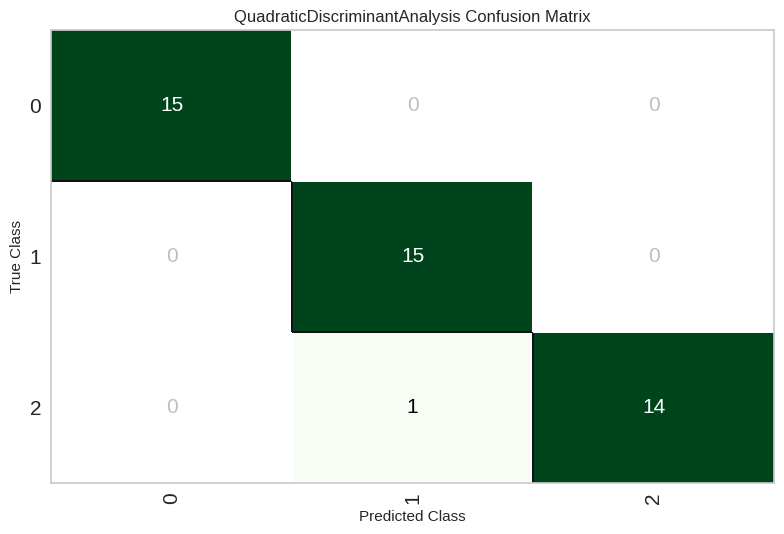

In [28]:
# Visualiser la matrice de confusion du meilleur modèle
plot_model(best, plot='confusion_matrix')

### Évaluation complète du modèle
La fonction evaluate_model fournit une interface interactive pour évaluer le modèle sur plusieurs métriques et visualisations.

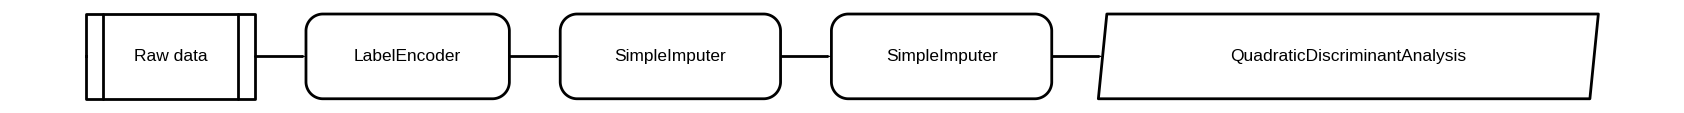

In [29]:
# Évaluer le meilleur modèle
evaluate_model(best)

## 🚀 Création de modèles simples avec PyCaret

En plus de comparer plusieurs modèles, PyCaret permet également de créer et d'entraîner des modèles individuels avec la fonction `create_model`. Cette fonction est utile lorsque vous souhaitez entraîner un modèle spécifique sans comparer une multitude d'options.

### Utilisation de `create_model`

Voici comment utiliser cette fonction pour créer un modèle simple :


In [30]:
# Créer un modèle de régression logistique
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## 🔧 Tunage des hyperparamètres avec PyCaret

La fonction `tune_model` permet d'ajuster les hyperparamètres d'un modèle. Le résultat de cette fonction est une grille de scores avec des scores validés par validation croisée pour chaque pli. Le meilleur modèle est sélectionné en fonction de la métrique définie dans le paramètre `optimize`.

### Utilisation de `tune_model`

Voici comment utiliser cette fonction pour ajuster les hyperparamètres d'un modèle :


In [31]:
# Créer un modèle de forêt aléatoire
rf = create_model('rf')

# Tunage des hyperparamètres du modèle de forêt aléatoire
tuned_rf = tune_model(rf, optimize='F1')
# tuned_rf = tune_model(rf, optimize='F1', search_library='optuna') # Celui la utilise Optuna et est donc plus long

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9870,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9643,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,0.8000,0.8800,0.7750,0.6970,0.7435
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9714,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### Personnalisation du grid de recherche
Vous pouvez personnaliser le grid de recherche en passant vos propres paramètres. Voici un exemple avec un grid personnalisé :

In [32]:
# Grid de recherche personnalisé
custom_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Tunage des hyperparamètres avec un grid personnalisé et Optuna
tuned_rf = tune_model(rf, custom_grid=custom_grid, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9714,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## 🛠️ Modèles d'ensemble, de mélange et d'empilement avec PyCaret

PyCaret permet non seulement de créer et de comparer des modèles individuels, mais aussi d'utiliser des techniques avancées comme les modèles d'ensemble, de mélange et d'empilement pour améliorer les performances des modèles.

### Modèles d'ensemble

Les modèles d'ensemble combinent les prédictions de plusieurs modèles de base pour améliorer les performances globales. PyCaret simplifie l'utilisation des modèles d'ensemble avec la fonction `ensemble_model`.


### Bagging et Boosting
![Bagging et Boosting](https://github.com/Codect24/TP_Alternant_2024_Pycaret/blob/main/image.png?raw=1)

In [33]:
# Créer un modèle d'ensemble en bagging en utilisant le modèle de forêt aléatoire
ensemble_rf = ensemble_model(rf, method='Bagging')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:03:36
Status,. . . . . . . . . . . . . . . . . .,Creating Logs
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [34]:
ensemble_rf = ensemble_model(rf, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.0000,0.8000,0.8800,0.7750,0.6970,0.7435
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### Modèles de mélange
Le mélange de modèles combine plusieurs modèles pour obtenir une prédiction moyenne ou pondérée. PyCaret offre une fonction pratique blend_models pour cela.

In [35]:
qda = create_model('qda')

nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8182,0.9740,0.8182,0.8788,0.8061,0.7250,0.7642
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
# Mélanger plusieurs modèles
blended = blend_models(estimator_list=[rf, qda, nb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### Modèles d'empilement
L'empilement de modèles consiste à utiliser les prédictions de plusieurs modèles comme entrées pour un modèle final (métamodèle). PyCaret permet de créer facilement des modèles d'empilement avec la fonction stack_models.

In [37]:
# Empiler plusieurs modèles
stacked = stack_models(estimator_list=[rf, qda, nb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## 🔮 Prédiction avec PyCaret

Après avoir entraîné et sélectionné le meilleur modèle, vous pouvez utiliser ce modèle pour faire des prédictions sur de nouvelles données. PyCaret fournit la fonction `predict_model` pour prédire sur des ensembles de données de test ou de nouvelles données.

### Prédiction sur l'ensemble de test

Vous pouvez prédire sur l'ensemble de test retenu (holdout) pour évaluer la performance du modèle sur des données non vues.

In [38]:
# Prédire sur l'ensemble de test retenu
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9778,1.0000,0.9778,0.9792,0.9778,0.9667,0.9674


### Prédiction sur de nouvelles données
Pour prédire sur de nouvelles données, vous pouvez passer un DataFrame à la fonction predict_model.

In [39]:
# Supposons que new_data soit un DataFrame contenant les nouvelles données
new_data = data.sample(10).drop(columns=['species'])
# Prédire sur de nouvelles données
predictions = predict_model(best, data=new_data)
predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,prediction_label,prediction_score
73,6.1,2.8,4.7,1.2,Iris-versicolor,0.9928
18,5.7,3.8,1.7,0.3,Iris-setosa,1.0000
118,7.7,2.6,6.9,2.3,Iris-virginica,1.0000
78,6.0,2.9,4.5,1.5,Iris-versicolor,0.9932
76,6.8,2.8,4.8,1.4,Iris-versicolor,0.9984


## 💾 Exportation et sauvegarde des modèles avec PyCaret

Après avoir entraîné et évalué votre modèle, il est souvent nécessaire de le sauvegarder pour une utilisation ultérieure ou de le déployer en production. PyCaret offre plusieurs options pour exporter et sauvegarder vos modèles.

### Finaliser le modèle

La fonction `finalize_model` entraîne le modèle sur l'intégralité des données disponibles.

In [40]:
# Finaliser le meilleur modèle
final_best = finalize_model(best)

### Charger le modèle depuis MLflow
Si vous avez utilisé MLflow pour suivre vos expérimentations, vous pouvez facilement charger un modèle sauvegardé depuis MLflow.

In [41]:
pipeline = load_model('C:/Users/tomle/OneDrive/Documents/TP_Alternant_2024_Pycaret/mlruns/635673703510918278/328bf339661840d091e68c8c44ef9a73/artifacts/model/model')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/tomle/OneDrive/Documents/TP_Alternant_2024_Pycaret/mlruns/635673703510918278/328bf339661840d091e68c8c44ef9a73/artifacts/model/model.pkl'

### Sauvegarde manuelle du modèle
Vous pouvez sauvegarder un modèle manuellement sur le disque pour une utilisation ultérieure.

In [ ]:
save_model(final_best, model_name='my_best_model')

### Créer une application avec PyCaret
PyCaret permet de créer une application interactive pour déployer et utiliser le modèle.

In [ ]:
create_app(final_best)

### Créer une API avec PyCaret
Vous pouvez également créer une API pour votre modèle avec PyCaret.

In [ ]:
create_api(final_best, api_name='my_best_model_api')

### Convertir le modèle en Java
PyCaret permet également de convertir un modèle en code Java.

In [ ]:
convert_model(rf, 'java') # Ca marche surtout pour les arbres

## 🎉 Félicitations, vous êtes prêt à vous amuser avec PyCaret !

Vous avez maintenant tout ce qu'il faut pour explorer, créer, tuner, et déployer des modèles de machine learning avec PyCaret.

### Un petit rappel des étapes que nous avons parcourues :

- 📊 Préparation des données
- 🚀 Création de modèles simples
- 🔧 Tunage des hyperparamètres
- 🛠️ Utilisation des modèles d'ensemble, de mélange et d'empilement
- 🔮 Prédiction sur de nouvelles données
- 💾 Exportation et sauvegarde des modèles

Et maintenant, il est temps de vous amuser vraiment ! 🌟


# Partie II : Analyse des crédits allemands avec PyCaret 🏦

Bienvenue à cette deuxième partie de notre TP ! 🎉 Maintenant que vous avez découvert les bases de PyCaret à travers la documentation et les exemples, il est temps de mettre tout cela en pratique avec le célèbre dataset German Credit Data. Ce dataset contient des informations sur des prêts accordés en Allemagne, et votre objectif est d'analyser ces données pour prédire si un client est un bon ou un mauvais payeur.

Dans cette session, vous allez voir comment, en quelques lignes de code seulement, on peut obtenir des résultats impressionnants ! 🚀

## Votre Mission
Vous avez toutes les cartes en main pour obtenir des résultats exceptionnels. Voici quelques points clés à garder en tête pendant que vous travaillez :

- Préparation des Données : Une bonne préparation des données est essentielle. Pensez à la façon dont vous allez traiter les valeurs manquantes, encoder les variables catégorielles et normaliser les données.

- Choix des Modèles : PyCaret offre une large gamme de modèles. Quels modèles allez-vous choisir pour obtenir une bonne performance sur ce dataset ? Vous pouvez aussi les confronter tous, si vous avez le temps. 😎

- Hyperparamétrage : L'optimisation des hyperparamètres peut grandement améliorer les performances d'un modèle. Comment pouvez-vous automatiser cette étape avec PyCaret ? Allez-vous tester des ensembles ?

- Évaluation des Performances : Quels métriques allez-vous utiliser pour évaluer les performances de vos modèles ?

- Interprétabilité : Je vous donne rendez-vous cet après-midi pour le TP de Manon. ⌛

À vous de jouer ! Utilisez ce que vous avez appris et laissez votre créativité guider vos pas. Vous avez tout ce qu'il faut pour obtenir des résultats exceptionnels. Prêt à vous immerger dans l'analyse de données et la création de modèles ? Allons-y ! 😃

---

Merci d'avoir suivi ce tutoriel. N'hésitez pas à consulter la [documentation officielle de PyCaret](https://pycaret.readthedocs.io/en/latest/api/classification.html#module-pycaret.classification) pour plus de détails et des exemples supplémentaires.

# 🐸